In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
!pip install imblearn

In [ ]:
df=pd.read_csv(r"banksim dAtaset.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
encoder=LabelEncoder()
df['customer']=encoder.fit_transform(df['customer'])
df['age']=encoder.fit_transform(df['age'])
df['gender']=encoder.fit_transform(df['gender'])
df['merchant']=encoder.fit_transform(df['merchant'])
df['category']=encoder.fit_transform(df['category'])
df.drop(['zipcodeOri','zipMerchant'],axis=1,inplace=True)
df=df.query('amount>0')
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [ ]:
fraud = df[df['fraud']==1]
non_fraud = df[df['fraud']==0]
print(fraud.shape , non_fraud.shape)

(7200, 8) (587391, 8)


In [ ]:
x=df.drop('fraud',axis=1)
y=df['fraud']
print(x.head())
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72
0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


<AxesSubplot:>

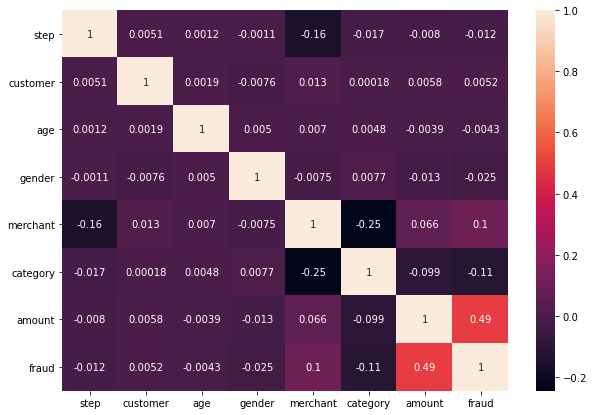

In [ ]:
plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x_new=pd.DataFrame(data=df,columns=['amount','category','merchant','gender','age','customer'])
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=0)

In [ ]:
models={'name':['decision tree (simple)','decision tree (under sampling)','decision tree (over sampling)','decision tree (smote)']}
models = pd.DataFrame(models)
models['accuracy']=np.nan
models['precision score']=np.nan
models['recall score']=np.nan
models['f1 score']=np.nan
models['fitting (in %)']=np.nan

In [ ]:
def get_report(model,x_train,x_test,y_train,y_test,name):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(name,'\n')
  classification_report_m=classification_report(y_test,y_pred)
  print(classification_report_m)
  confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
  print('confusion matrix')
  print(confusion_matrix, '\n')
  a=model.score(x_train,y_train)
  b=model.score(x_test,y_test)
  c=a-b
  print('for understanding overfitting and underfitting')
  print(a,' - ',b,' = ',c,'\n')
  accuracy=accuracy_score(y_test,y_pred)
  print('accuracy =',accuracy)
  precision_score_m=precision_score(y_test,y_pred)
  print('presicion score = ',precision_score_m)
  recall_score_m=recall_score(y_test,y_pred)
  print('recall score =',recall_score_m)
  f1_score_m=f1_score(y_test,y_pred)
  print('F1 score =',f1_score_m)
  models.loc[models['name'] == name, 'accuracy'] = accuracy
  models.loc[models['name'] == name, 'precision score'] = precision_score_m
  models.loc[models['name'] == name, 'recall score'] = recall_score_m
  models.loc[models['name'] == name, 'f1 score'] = f1_score_m
  models.loc[models['name'] == name, 'fitting (in %)'] = c*100

In [ ]:
rus=RandomUnderSampler()
x2_train,y2_train=rus.fit_resample(x_train,y_train)
np.bincount(y2_train)
#x21_train,x21_test,y21_train,y21_test=train_test_split(x2_train,y2_train,test_size=0.2,random_state=0)

array([5735, 5735], dtype=int64)

In [ ]:
ros = RandomOverSampler()
x3_train,y3_train=ros.fit_resample(x_train,y_train)
np.bincount(y3_train)
#x31_train,x31_test,y31_train,y31_test=train_test_split(x3_train,y3_train,test_size=0.2,random_state=0)

array([469937, 469937], dtype=int64)

In [ ]:
smt=SMOTE()
x4_train,y4_train=smt.fit_resample(x_train,y_train)
np.bincount(y4_train)
#x41_train,x41_test,y41_train,y41_test=train_test_split(x4_train,y4_train,test_size=0.2,random_state=0)

array([469937, 469937], dtype=int64)

In [ ]:
gini = DecisionTreeClassifier(random_state = 100)

# SIMPLE

In [ ]:
#Tuning
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20, None],
    'min_samples_leaf': [5, 10, 20, 50, 100,500,10000],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=gini, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500, 10000]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}


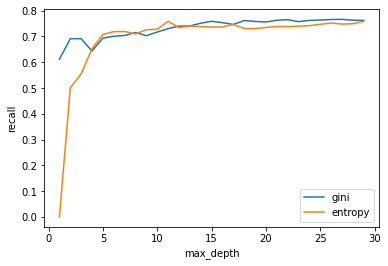

In [ ]:
#pruning
max_depth=[]
re_gini=[]
re_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    
    re_gini.append(recall_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    
    re_entropy.append(recall_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'re_gini': pd.Series(re_gini),
                    're_entropy': pd.Series(re_entropy),
                    'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','re_gini', data=d, label='gini')
plt.plot('max_depth','re_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()

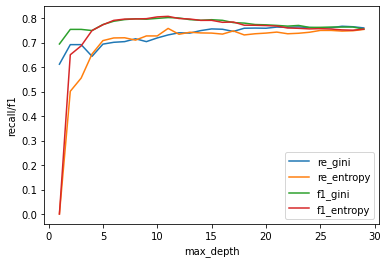

In [ ]:
#pruning
max_depth=[]
re_gini=[]
re_entropy=[]
f1_gini=[]
f1_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    
    re_gini.append(recall_score(y_test,pred))
    f1_gini.append(f1_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    
    re_entropy.append(recall_score(y_test,pred))
    f1_entropy.append(f1_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'re_gini': pd.Series(re_gini),
                    're_entropy': pd.Series(re_entropy),
                    'f1_gini': pd.Series(f1_gini),
                    'f1_entropy': pd.Series(f1_entropy),
                    'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','re_gini', data=d, label='re_gini')
plt.plot('max_depth','re_entropy', data=d, label='re_entropy')
plt.plot('max_depth','f1_gini', data=d, label='f1_gini')
plt.plot('max_depth','f1_entropy', data=d, label='f1_entropy')
plt.xlabel('max_depth')
plt.ylabel('recall/f1')
plt.legend()

In [ ]:
#best-simple
entropy = DecisionTreeClassifier(criterion= "entropy", max_depth= 10, min_samples_leaf= 5,random_state = 100)
name='decision tree (simple)'
get_report(entropy,x_train,x_test,y_train,y_test,name)

decision tree (simple) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.89      0.73      0.80      1465

    accuracy                           1.00    118919
   macro avg       0.95      0.86      0.90    118919
weighted avg       1.00      1.00      1.00    118919

confusion matrix
[[117327    127]
 [   399   1066]] 

for understanding overfitting and underfitting
0.9961990615382028  -  0.9955768211976219  =  0.000622240340580893 

accuracy = 0.9955768211976219
presicion score =  0.8935456831517183
recall score = 0.7276450511945393
F1 score = 0.8021068472535742


In [ ]:
models.dropna()

,name,accuracy,precision score,recall score,f1 score,fitting (in %)


# UNDERSAMPLING

In [ ]:
#Tuning
grid_search.fit(x2_train, y2_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500, 10000]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [ ]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}


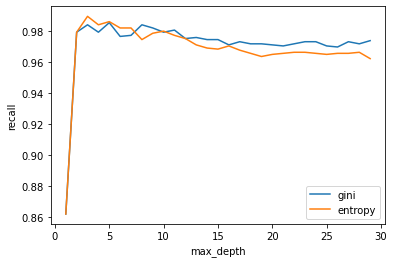

In [ ]:
#pruning
max_depth=[]
re_gini=[]
re_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x2_train,y2_train)
    pred=dtree.predict(x_test)
    
    re_gini.append(recall_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(x2_train,y2_train)
    pred=dtree.predict(x_test)
    
    re_entropy.append(recall_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'re_gini': pd.Series(re_gini),
                    're_entropy': pd.Series(re_entropy),
                    'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','re_gini', data=d, label='gini')
plt.plot('max_depth','re_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()

In [ ]:
#best-undersampling1
gini1= DecisionTreeClassifier(criterion= "gini", max_depth= 10, min_samples_leaf= 10,random_state = 100)
name='decision tree (undersampling)'
get_report(gini1,x2_train,x_test,y2_train,y_test,name)

decision tree (undersampling) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    117454
           1       0.23      0.98      0.38      1465

    accuracy                           0.96    118919
   macro avg       0.62      0.97      0.68    118919
weighted avg       0.99      0.96      0.97    118919

confusion matrix
[[112736   4718]
 [    36   1429]] 

for understanding overfitting and underfitting
0.9762859633827375  -  0.9600232090750848  =  0.016262754307652783 

accuracy = 0.9600232090750848
presicion score =  0.2324711241255897
recall score = 0.9754266211604096
F1 score = 0.37545980031529164


In [ ]:
models.dropna()

,name,accuracy,precision score,recall score,f1 score,fitting (in %)


# OVERSAMPLING

In [ ]:
#Tuning
grid_search.fit(x3_train, y3_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500, 10000]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}


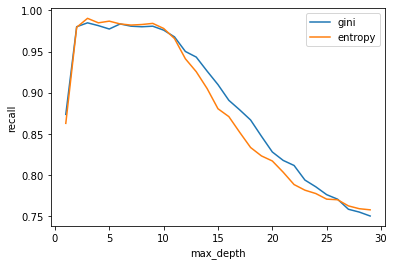

In [ ]:
#pruning
max_depth=[]
re_gini=[]
re_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x3_train,y3_train)
    pred=dtree.predict(x_test)
    
    re_gini.append(recall_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(x3_train,y3_train)
    pred=dtree.predict(x_test)
    
    re_entropy.append(recall_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'re_gini': pd.Series(re_gini),
                   're_entropy': pd.Series(re_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','re_gini', data=d, label='gini')
plt.plot('max_depth','re_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()

In [ ]:
#oversampling
entropy1 = DecisionTreeClassifier(criterion= "entropy", max_depth= None, min_samples_leaf= 5,random_state = 100)

name='decision tree (oversampling)'
get_report(entropy1,x3_train,x_test,y3_train,y_test,name)

decision tree (oversampling) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.67      0.82      0.74      1465

    accuracy                           0.99    118919
   macro avg       0.84      0.91      0.87    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[116871    583]
 [   266   1199]] 

for understanding overfitting and underfitting
0.998711529417773  -  0.9928606866858954  =  0.005850842731877526 

accuracy = 0.9928606866858954
presicion score =  0.6728395061728395
recall score = 0.8184300341296928
F1 score = 0.7385278718817369


In [ ]:
models

,name,accuracy,precision score,recall score,f1 score,fitting (in %)
0,decision tree,NaN,NaN,NaN,NaN,NaN
1,decision tree (under sampling),NaN,NaN,NaN,NaN,NaN
2,decision tree (over sampling),NaN,NaN,NaN,NaN,NaN
3,decision tree (smote),NaN,NaN,NaN,NaN,NaN


# SMOTE

In [ ]:
#Tuning
grid_search.fit(x4_train, y4_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500, 10000]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}


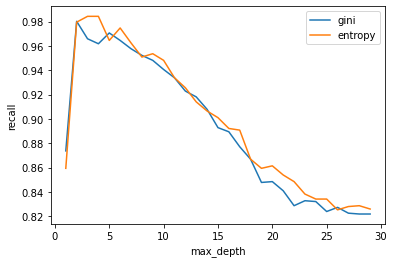

In [ ]:
#pruning
max_depth=[]
re_gini=[]
re_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x4_train,y4_train)
    pred=dtree.predict(x_test)
    
    re_gini.append(recall_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(x4_train,y4_train)
    pred=dtree.predict(x_test)
    
    re_entropy.append(recall_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'re_gini': pd.Series(re_gini),
                   're_entropy': pd.Series(re_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','re_gini', data=d, label='gini')
plt.plot('max_depth','re_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()

In [ ]:
#smote
entropy2 = DecisionTreeClassifier(criterion= "entropy", max_depth= None, min_samples_leaf= 5,random_state = 100)
name='decision tree (smote)'
get_report(entropy2,x4_train,x_test,y4_train,y_test,name)

decision tree (smote) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117454
           1       0.59      0.85      0.69      1465

    accuracy                           0.99    118919
   macro avg       0.79      0.92      0.84    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[116578    876]
 [   224   1241]] 

for understanding overfitting and underfitting
0.9965878404977688  -  0.9907500063068139  =  0.00583783419095496 

accuracy = 0.9907500063068139
presicion score =  0.5862068965517241
recall score = 0.847098976109215
F1 score = 0.6929089893914014


In [ ]:
models.dropna()

,name,accuracy,precision score,recall score,f1 score,fitting (in %)


# FUNCTION-(PLSS CHECK)

In [ ]:
#pruning
def pruning_re(x,y,z,u):
 max_depth=[]
 re_gini=[]
 re_entropy=[]
 for i in range(1,30):
     dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
     dtree.fit(x,y)
     pred=dtree.predict(z)
    
     re_gini.append(recall_score(u,pred))
    
     dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
     dtree.fit(x,y)
     pred=dtree.predict(z)
    
     re_entropy.append(recall_score(u,pred))
    
     max_depth.append(i)
    
     d=pd.DataFrame({'re_gini': pd.Series(re_gini),
                   're_entropy': pd.Series(re_entropy),
                   'max_depth': pd.Series(max_depth)})
    
 plt.plot('max_depth','re_gini', data=d, label='gini')
 plt.plot('max_depth','re_entropy', data=d, label='entropy')
 plt.xlabel('max_depth')
 plt.ylabel('recall')
 plt.legend()

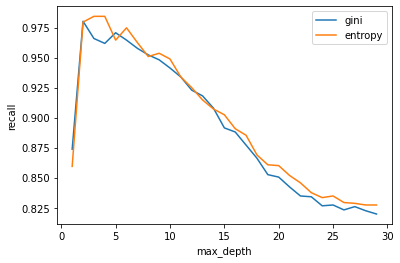

In [ ]:
pruning_re(x4_train,y4_train,x_test,y_test)

In [ ]:
#pruning
def pruning_f1(x,y,z,u):
 max_depth=[]
 f1_gini=[]
 f1_entropy=[]
 for i in range(1,30):
     dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
     dtree.fit(x,y)
     pred=dtree.predict(z)
    
     f1_gini.append(f1_score(u,pred))
    
     dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
     dtree.fit(x,y)
     pred=dtree.predict(z)
    
     f1_entropy.append(f1_score(u,pred))
    
     max_depth.append(i)
    
     d=pd.DataFrame({'f1_gini': pd.Series(f1_gini),
                   'f1_entropy': pd.Series(f1_entropy),
                   'max_depth': pd.Series(max_depth)})
    
 plt.plot('max_depth','f1_gini', data=d, label='gini')
 plt.plot('max_depth','f1_entropy', data=d, label='entropy')
 plt.xlabel('max_depth')
 plt.ylabel('f1-score')
 plt.legend()